In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline



In [55]:
data = pd.read_csv(r'C:\Users\Zaid\Desktop\ADS1001\housing.csv')
data=data.dropna()
data = pd.DataFrame(data)
data.rename(columns={'MEDV':'PRICE'}, inplace=True)
data.head()
data.drop(['B'], axis = 1)
data.drop(['CHAS'], axis = 1)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [56]:
#First lets create a model that takes into account all variables and predicts price off that

#Our next step is to divide the data into “attributes” and “labels”. 
# X variable contains all the attributes/features and y variable contains labels.

X = data[['CRIM','ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','LSTAT']]
y = data['PRICE']



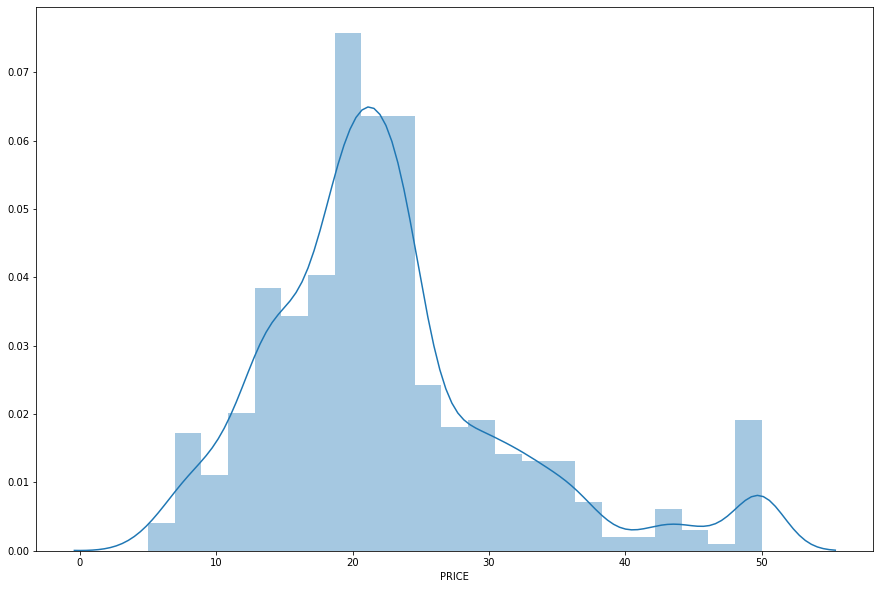

In [57]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['PRICE'])

# We can see that the average price is at 20

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [59]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
print(regressor.intercept_)

# the regression model has to find the most optimal coefficients for all the attributes.
# To see what coefficients our regression model has chosen, execute the following script:
print(regressor.coef_)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

# This means that for a unit increase in “CRIM”, there is a decrease of -0.089846 units in the PRICE.
# Similarly, a unit decrease in “INDUS“ results in an increase of 0.00032 units in the PRICE.

48.61890758027898
[-1.27998063e-01  5.86185394e-02  4.46284109e-02 -2.09842446e+01
  2.86918042e+00  9.24396091e-03 -1.50910990e+00  3.17162992e-01
 -1.25201445e-02 -1.00525266e+00 -5.81493177e-01]


,Coefficient
CRIM,-0.127998
ZN,0.058619
INDUS,0.044628
NOX,-20.984245
RM,2.869180
AGE,0.009244
DIS,-1.509110
RAD,0.317163
TAX,-0.012520
PTRATIO,-1.005253


In [61]:
# Now let's do prediction on test data.

y_pred = regressor.predict(X_test)

In [62]:
# Check the difference between the actual value and predicted value.
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
307,28.2,32.802932
343,23.9,28.020810
47,16.6,18.110790
67,22.0,21.529067
362,20.8,18.939236
132,23.0,20.121017
292,27.9,32.584809
31,14.5,18.296774
218,21.5,22.488352
90,22.6,27.097170


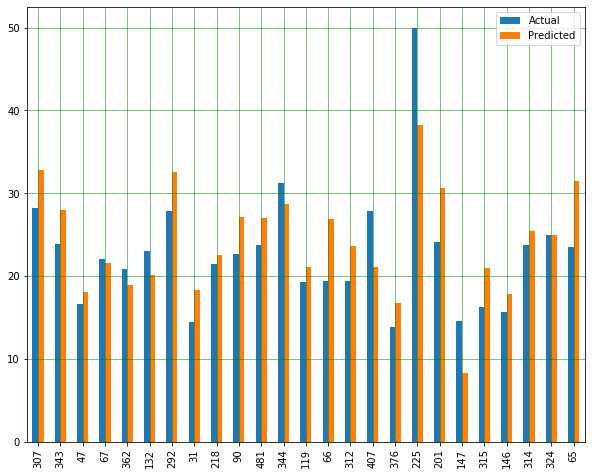

In [63]:
# Now let's plot the comparison of Actual and Predicted values
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [64]:
# To evaluate the performance of the algorithm lets find the MAE, MSE and RMSE values

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# You can see that the value of root mean squared error is 5.86, 
# which is slightly greater than 22% of the mean value which is 22.53. 
# This means that our algorithm was not very accurate but can still make reasonably okay predictions.

Mean Absolute Error: 3.714535868415684
Mean Squared Error: 23.52701634550846
Root Mean Squared Error: 4.850465580282831
